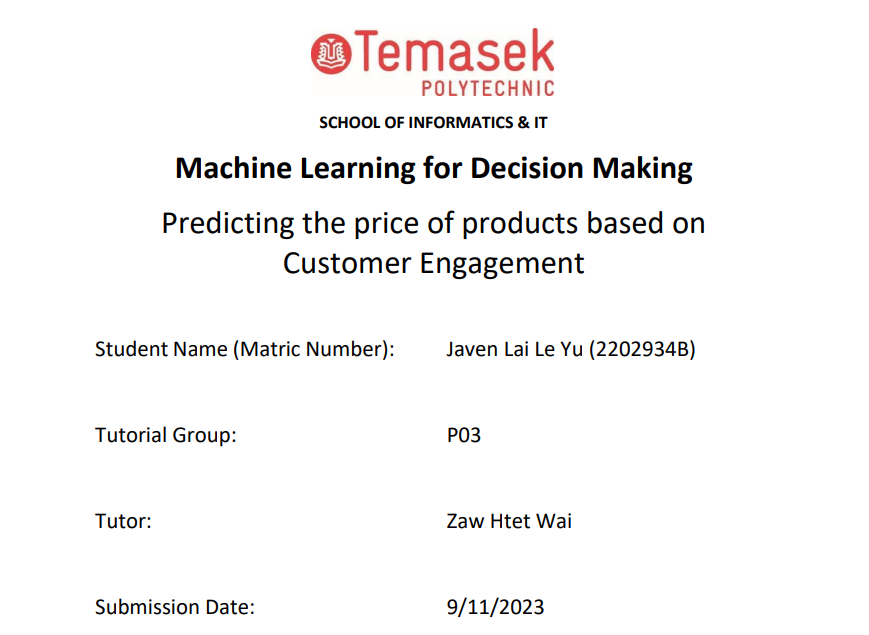
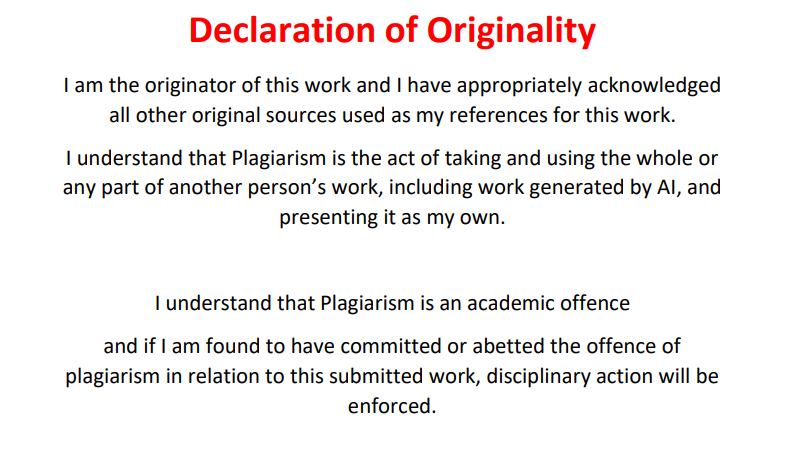
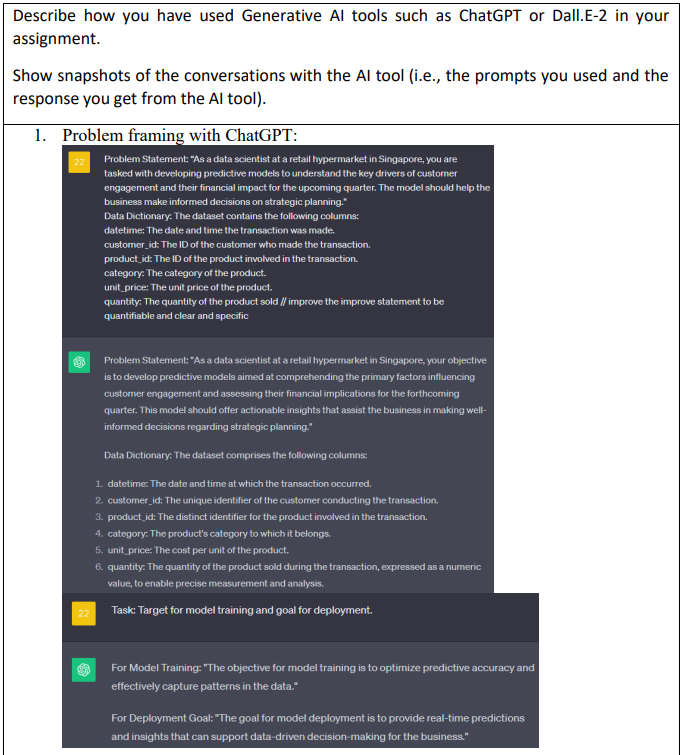
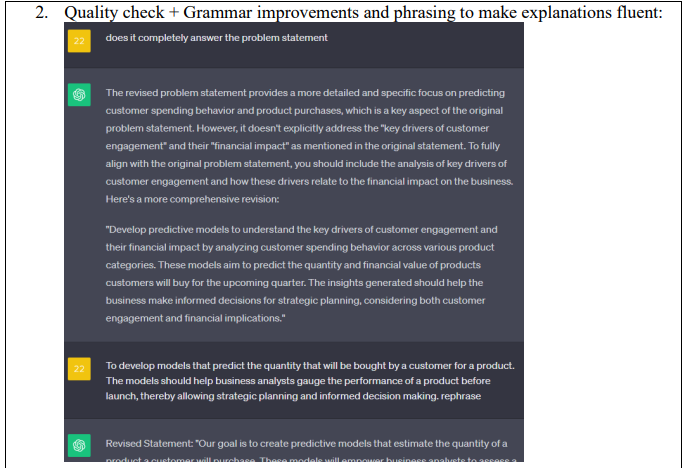
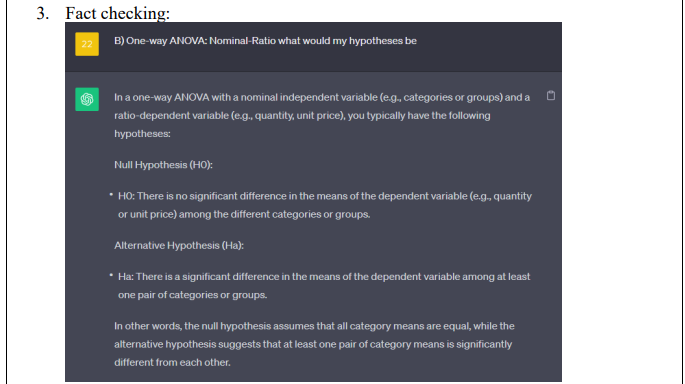
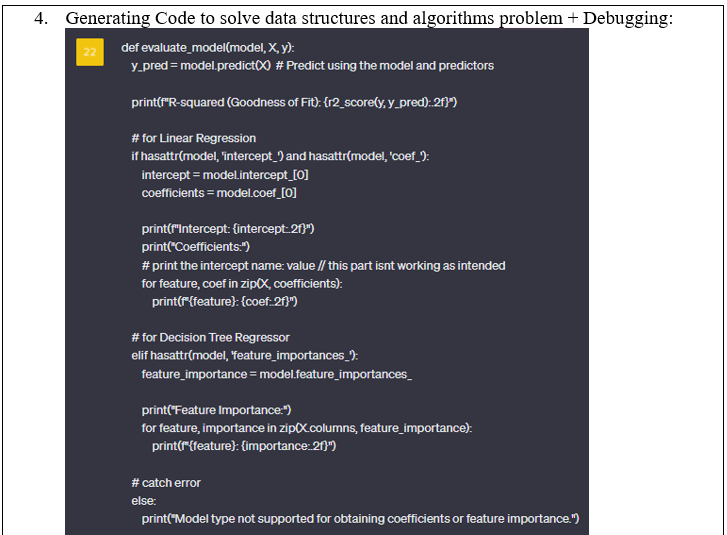
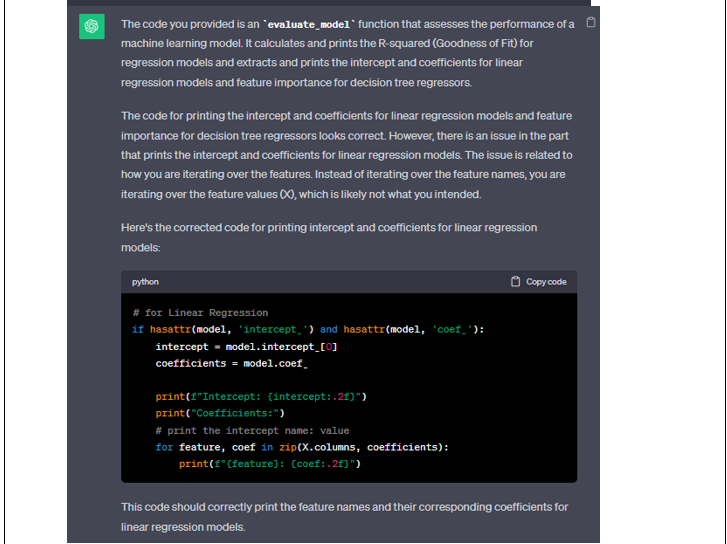
#### All retrievable conversations with ChatGPT:
- https://chat.openai.com/share/2f07b504-cdc7-4af6-b3f9-1803397adb77 
- https://chat.openai.com/share/eac1cc39-e944-4509-9d54-e08c52ca58b7 
- https://chat.openai.com/share/6aa8965f-4bbc-4cc2-8abf-5d1603f324c2 
- https://chat.openai.com/share/cf90d57b-8425-4502-a871-71a0a8c3d06e 

## 1. Introduction

### Business Background
Retail Hypermarket, a Singapore-based retail hypermarket, follows a business model of providing competitive pricing in order to attract customers. Retail Hypermarket wants to explore possible factors that drive customers to be willing to spend more money on a product as they are striving to enhance their profitability.

### 1.0 Business Requirement
Retail Hypermarket wants to understand how factors affect customers' spending behavior in order to forecast the optimal price for a product to facilitate strategic planning for the next quarter. I am hired as Data Scientist to study customer engagement of Retail Hypermarket and build models that could predict how much a customer spends/engages on a product.

### 1.1 Problem Statement
Develop predictive models to understand the key drivers of customer engagement and their financial impact **for the upcoming quarter**. The model should help the business make informed decisions on strategic planning.

### 1.2 Objective
Develop predictive models that understand how product type, customer type, bulk purchasing, and market trends impact how much a customer is willing to spend on a product. The models are trained to **predict the unit price of a product for a transaction** based on the product type, customer purchasing behavior and market trends.

### 1.3 Goal for deployment
1.3.1 Whitebox:
- Highly interpretable
- Rationale behind how the model derives a prediction can be clearly understood.

1.3.2 Blackbox:
- Predictions are highly accurate.
- Rationale behind how the model derives its prediction can be understood.

### 1.4 Inputs for Models
Target: Unit Price

Potential predictors:
- Product type: Certain products are supposed to be more expensive.
- Customer type: Certain customers are wealthier, hence able to afford to spend more.
- Quantity: Bulk purchases may receive discounts. Customers not willing to pay so much because they have to buy multiple.
- Quarter: To capture market trend for different quarters of the year.

### 1.5 Considerations
- Predictors should be readily available before occurrence of prediction.
- Data used to train models should be recent, to ensure the patterns and intricacies the model works on matches the current trend. This makes the model usable as the predictions are reliable.
- Models should be well-generalized to predict unseen future occurrences with similar accuracy as training dataset; no overfitting on training data.
- Models should adhere to AI ethics and regulations, ensuring transparency, fairness, absence of bias, and non-discrimination.

### 1.6 Metrics for Model Evaluation
1.6.1 **Goodness of Fit: R^2** to analyse how well to predictions can be explained by the predictor values, to assess if the patterns and intricacies of how customers engage in purchase of various products has been captured by model.

1.6.2 **Accuracy: Mean Absolute Percentage Error (MAPE)** to assess the accuracy percentage of an average prediction compared to the actual value. 

As unit price can range from cents to thousands of dollars, MAPE is the most suitable measure for assessing the accuracy of a model's prediction in a clear and meaningful way for the nature of the models' target because it provides a relative measure of prediction accuracy, rather than a definitive error value to fit all ranges of prediction.

### 1.7 Success Criteria for Project
- Deploy **1** predictive model to be presented to Retail Hypermarket for usage.
- Before deployment, a model's MAPE should be below 20%, indicating a prediction accuracy of around 80% to be considered as 'good forecasting' hence acceptable for business usage. 
- The accuracy should not be 100% as this likely indicates overfitting.
- Model fit should be above 85%, to affirm model is explainable and its decisions are closely based off truth of historical data; no underfitting, hence reliable.
- Goal of deployment (1.3) should be fulfilled.
- The black-box model should outperform the white-box model by a noticeable margin of minimally 5% if chosen for deployment, to ensure the choice of the more complex model is justified by significantly improved accuracy.

### 1.8 Environment
- New Products and Customers:
The model should also work for new products and customers not in training dataset. This ensures usability of models sustainable for future usage.

- Economic Status:
Customer interests and spending behaviour may change during recessions or economic boom. These trends may not be captured and identified if they are not within the training dataset.

- Market Trends:
The market trend and customers' spending behavior can change rapidly in this fast-paced society, and may differ from the training data.

- Seasonal changes:
Unprecedented events like a virus outbreak, unexpected intense rainfall or scorching weather period, may deter customers from visiting Retail Hypermarket, resulting financial performance that cannot be explained by the models.

- Competition:
New retail companies may emerge in the future and influence customers' decision on whether to patronize Retail Hypermarket, and the models are unable to account for such external factors.

#### In summary:
1. The training dataset must be recent and reflective of current trends and customer behaviour.
2. The Model's code and documentations should be clear, easy to understand, and adaptable for future modifications (e.g. changing dataset, random_state).

### 1.9 Target leakage
#### Do not include:
- **Features not available at the time of prediction** as this makes the model unusable as the business would not have access to such information when making pricing decisions. E.g. Year.
- **Features directly related unit price** to prevent multicollinearity issues.
- **Features with unrealistically high collinearity with unit price**, which could be derived from the target and bias the model.
- **High cardinality columns** like ID to prevent overfitting and ensure model generalization with new, unseen data.
- **Multicollinearity should be avoided** as it leads to reduced model interpretability, unstable coefficient estimates, increased standard errors, misleading feature importance, and difficulty in identifying the true drivers of a prediction.

## 2. Data Attributes

### 2.1 Data Understanding
The dataset 'synthetic_data.csv' was provided by Retail Hypermarket, which contains the company's transaction records from 2022 onwards. A data dictionary, attached below, has also been provided for understanding what each column represents.

> 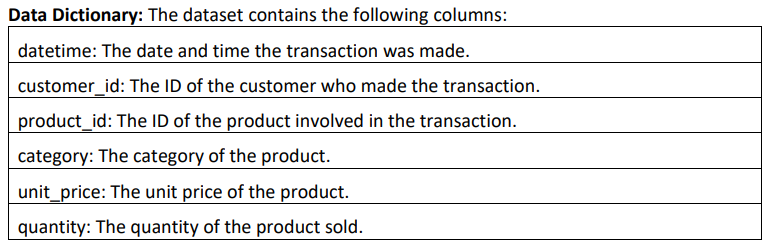

### 2.2 Data Inspection
#### 2.2.1 Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

SEED = 2202934 # admin number for random_state

#### 2.2.2 Loading csv into DataFrame

In [2]:
df = pd.read_csv('synthetic_data.csv')
print("Number of observations: ", len(df)) # count rows in df

Number of observations:  331664


There is sufficient data of 300K+ rows for train test splitting.

#### 2.2.3 Exploring Dataset

In [3]:
pd.set_option('display.float_format', '{:.10f}'.format) # show full unit_price without truncation
df.head()

,Datetime,Product_ID,Category,Quantity,Unit_Price,Customer_ID
0,2022-01-07,10106959,Stationery,9,1.5798753892,a225207859
1,2022-01-09,90097406,Sports,4,196.2533774599,a225207859
2,2022-01-10,10010465,Electronics,1,825.3742907058,a225207859
3,2022-01-14,10010510,Electronics,2,325.9650346646,a225207859
4,2022-01-16,40049430,Books,1,22.6019194627,a225207859


In [4]:
df.tail()

,Datetime,Product_ID,Category,Quantity,Unit_Price,Customer_ID
331659,2022-12-18,20026116,Groceries,5,5.3781616834,c891387366
331660,2022-12-23,10018925,Electronics,1,1193.8285186999,c891387366
331661,2022-12-27,20022820,Groceries,3,5.1754917125,c891387366
331662,2022-12-27,40042985,Books,2,38.5985362367,c891387366
331663,2022-12-31,20025163,Groceries,3,5.3977440791,c891387366


#### Evaluation:
1. **Datetime is missing time**. There is nothing that can be done about missing time as I am only provided with this dataset.


2. There is **no columns like Quarter or Month**. However, these seasonality features can be derived from the date in Datetime.


3. Unit_Price is a non-terminating number, which is strange as its unconventional for prices at supermarkets to go beyond cents. Hence, **Unit_Price should be rounded off to 2 d.p.**


4. The records seem to be in **time-series**, and ends at 31 December 2022? (Continued at 2.3.2.b)

#### 2.2.4 Are there duplicated records?

In [5]:
df.duplicated(subset=['Datetime', 'Customer_ID']).sum() # sum up number of duplicated rows

29362

This indicates that **there are customers who make multiple transactions a day**,  indicating that they bought different products at the same time. 

To check if there are duplicated records, I should factor in Product_ID as Retail Hypermarket wouldn't seperate the same product into different transaction. 

In [6]:
df.duplicated(subset=['Datetime', 'Customer_ID', 'Product_ID']).sum() # sum up duplicated transactions

0

There are **no duplicated records in dataset**.

#### 2.2.5 Check for data types and missing values

In [7]:
pd.set_option('display.float_format', '{:.3f}'.format) # revert df to round of to 3 d.p.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331664 entries, 0 to 331663
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Datetime     331664 non-null  object 
 1   Product_ID   331664 non-null  int64  
 2   Category     331664 non-null  object 
 3   Quantity     331664 non-null  int64  
 4   Unit_Price   331664 non-null  float64
 5   Customer_ID  331664 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 15.2+ MB


#### Takeaways:
1. No missing values for any columns because all columns have 331, 664 non-null values.
2. Datetime column is not in its proper format of a date datatype.

#### 2.2.6 Summary statistics

In [9]:
df.describe().loc[['min', 'mean', 'max']]

,Product_ID,Quantity,Unit_Price
min,10010000.000,1.000,1.001
mean,30263284.237,9.125,124.090
max,90099999.000,20.000,1199.947


In [10]:
df.nunique() # count of unique values in a column

Datetime          368
Product_ID      75781
Category           10
Quantity           20
Unit_Price     331664
Customer_ID      2648
dtype: int64

In [11]:
df.Category.unique() # identify all unique values in category col

array(['Stationery', 'Sports', 'Electronics', 'Books', 'Groceries',
       'Health & Beauty', 'Furniture', 'Automotive', 'Clothing', 'Toys'],
      dtype=object)

#### Takeaways:
1. All Product_IDs are 8 char.
2. Every transaction can only involve 1 to 20 of the same product.
3. Cheapest product is 1 dollar and most expensive is 1200 dollars. An average product costs 124 dollars per unit.
4. There are 10 types of product Categories.

#### Evaluation:
1. Datetime should not contain any anomalies if it can be successfully parsed into Date datatype.


2. Identifying anomaly values for Product_ID and Customer_ID can be tough as there are thousands of unique values; too many to manually inspect. Hence, I shall perform Exploratory Data Analysis to investigate for irregularities in these columns.


3. Category does not have any anomalies can all unique values are logical for a product category.


4. Quantity has no anomalies as all unique values are integer and within range of 1 to 20; no irregular values like 0.2 quantity or -1 quantity. This also suggests that there can be no partial purchases or refunds.

#### 2.2.7 Do Products have a fixed unit price

In [12]:
Product = df.sort_values(by=['Product_ID'])
Product.head(4)

,Datetime,Product_ID,Category,Quantity,Unit_Price,Customer_ID
126708,2022-05-22,10010000,Electronics,2,850.915,a704811449
326206,2022-05-26,10010000,Electronics,2,357.381,c567078712
173955,2022-09-06,10010000,Electronics,1,495.939,c849466466
105432,2022-11-07,10010000,Electronics,1,791.225,d703549797


#### Analysis:
Price of product changes over time. This validates the business context that the prices change over time to ensure competitive pricing.

### 2.3 Data Cleaning

#### 2.3.0 Rectifications based on Data Inspection:
1. Round off Unit_Price to 2 d.p.
2. Parse Datetime into date datatype.
3. Features extraction on Date to create Quarters.

#### 2.3.1 Unit_Price:

In [13]:
df['Unit_Price'] = round(df['Unit_Price'], 2)

#### 2.3.2.a Parsing Datetime:

In [14]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

There are no anomalies in Datetime as all values conform to Date datatype format.

#### 2.3.2.b Confirmation in data is in time-series

In [15]:
df.sort_values(by='Datetime', inplace=True)
df.tail(8)

,Datetime,Product_ID,Category,Quantity,Unit_Price,Customer_ID
48824,2023-01-03,50056627,Furniture,1,927.850,a793237418
150571,2023-01-03,70070603,Toys,9,24.140,d407005726
151609,2023-01-03,40041605,Books,3,5.020,a166502882
77889,2023-01-03,90093200,Sports,2,33.040,a253267567
200653,2023-01-03,70077230,Toys,3,8.880,a731741739
115899,2023-01-03,50050749,Furniture,2,985.720,a555546365
229742,2023-01-03,10012069,Electronics,1,1112.050,d112052977
95489,2023-01-03,30030537,Clothing,5,24.710,b004263214


#### Analysis:
- It's strange that these transactions were placed randomly within the 2022 dataset rather than at the end of the dataset as expected.
- This raises concerns about the reliable of the Datetime column, especially when the time values are missing from this column.

#### Evaluation:
- The Datetime for 2023 records may be incorrect as these records do not follow the typical pattern of transactional record systems where new transactions are found at the end of the dataset.


- Since there are 300K rows of data, sufficient for training and validating the model, I shall exclude the 2023 records and train my model solely on 2022 data due to suspicions in reliability of 2023 records: because time is missing from Datetime, its possible that this column has problems.


- However, 2023 records could be used for testing of models.

In [16]:
df_test = df[df['Datetime'].dt.year == 2023]
df = df[df['Datetime'].dt.year != 2023]

In [17]:
len(df_test)

386

#### 2.3.3 Quarter:
Customer spending behavior can varies across seasons, hence I will create this column to allow user to predict prices for different quarters of the year.

In [18]:
df['Quarter'] = df['Datetime'].dt.to_period('Q').astype(str).str[-1]
# Only need the Quarter number, hence index last number in Quarter

### 2.4 Exploratory Data Analysis (EDA)

#### 2.4.1 Examine df:

In [19]:
df.sample(12) # randomly sample df to analyse data

,Datetime,Product_ID,Category,Quantity,Unit_Price,Customer_ID,Quarter
202559,2022-09-09,20025325,Groceries,13,5.110,b427385859,3
156686,2022-04-19,20027906,Groceries,4,7.200,a932278195,2
140011,2022-06-07,20026151,Groceries,20,15.960,b163794869,2
107385,2022-09-07,20020698,Groceries,3,7.150,c803531132,3
98011,2022-08-22,20021816,Groceries,12,6.630,d430635372,3
116324,2022-03-18,10104597,Stationery,9,6.440,c265821525,1
99808,2022-10-26,20023846,Groceries,1,9.800,d337801834,4
276817,2022-07-19,20029965,Groceries,17,18.840,c143779146,3
41869,2022-12-10,10016276,Electronics,1,238.300,b783903471,4
97082,2022-11-04,50057142,Furniture,2,987.410,c896817378,4


#### 2.4.2 EDA Graph Plotter:

In [20]:
def eda_plot(df, category, measure, plot_type='line', measurement='sum'):
    category_revenue = df.groupby(category)[measure].agg(measurement)    # Aggr the measure per category based on measurement
    plt.figure(figsize=(16, 6))                                          # Set the size of the graph
    
    # Toggle to the selected chart
    if plot_type == 'line':
        plt.plot(category_revenue.index, category_revenue.values, marker='o', linestyle='-')
        plt.grid(True)                                                   # turn on grid for easy readibility
        
    elif plot_type == 'bar':
        category_revenue = category_revenue.sort_values(ascending=False) # Sort the data in descending order
        plt.bar(category_revenue.index, category_revenue.values)
        
    else:
        print("Invalid plot_type. Please use 'line' or 'bar'.")          # error tolerance
        return
    
    # Remove '_' for easier readibility of legends
    measure = measure.replace('_', ' ')
    category = category.replace('_', ' ')
    
    # Add labels above the data points
    for x, y in zip(category_revenue.index, category_revenue.values):
        plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')
    
    plt.title(f'{measurement.capitalize()} {measure} per {category}')
    plt.xlabel(category)
    plt.ylabel(measure)
    plt.xticks(category_revenue.index)
    plt.show()

#### Usage:
> eda_plot(DataFrame, [Column in df], [measure, must be numerical], plot_type=[Type of Plot, line or bar, default=line], measurement=[measurement, sum/mean/median. default=sum])

#### 2.4.3 Average Unit Price per Quarter
- Is there a discernable spending pattern for each quarter?

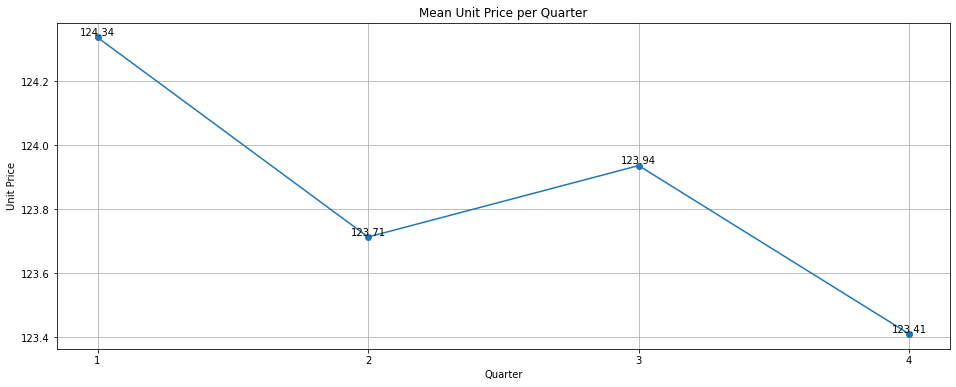

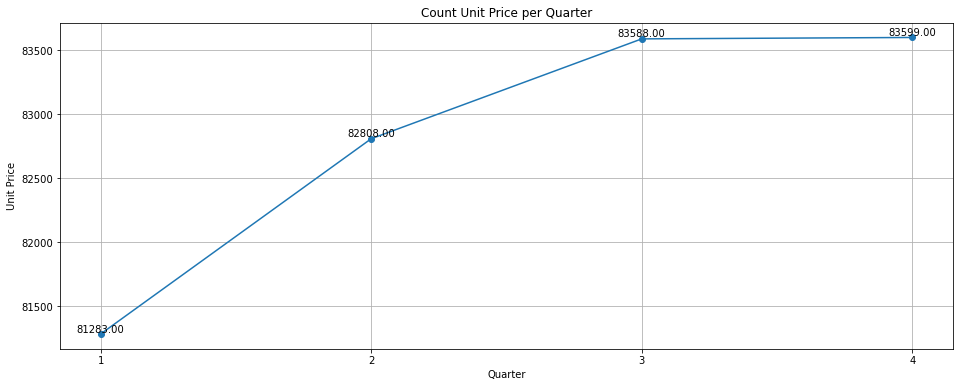

In [21]:
eda_plot(df, 'Quarter', 'Unit_Price', measurement='mean')
eda_plot(df, 'Quarter', 'Unit_Price', measurement='count')

#### A) Analysis:
1. There are variation in average unit price for all quarters are very minimal (1 dollars range).
2. There are more transactions during Q3 and Q4.

#### B) Evaluation:
There can be an argument that there are lesser customers during Q1 due to higher prices. To validate this assumption, I need to delve deeper.

#### C) Further Investigation:

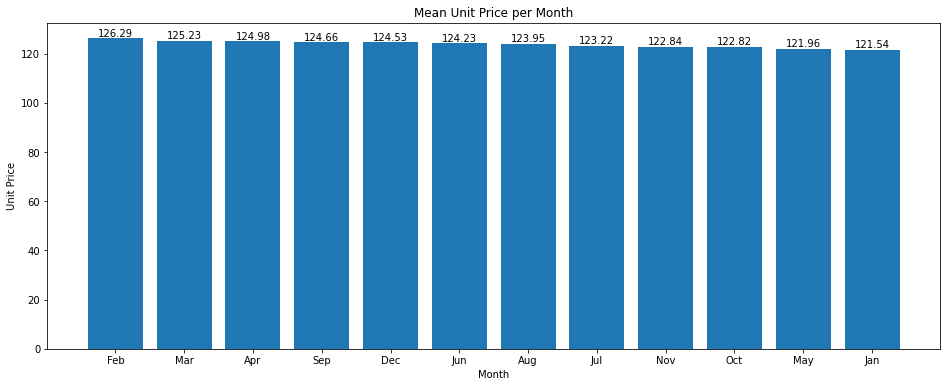

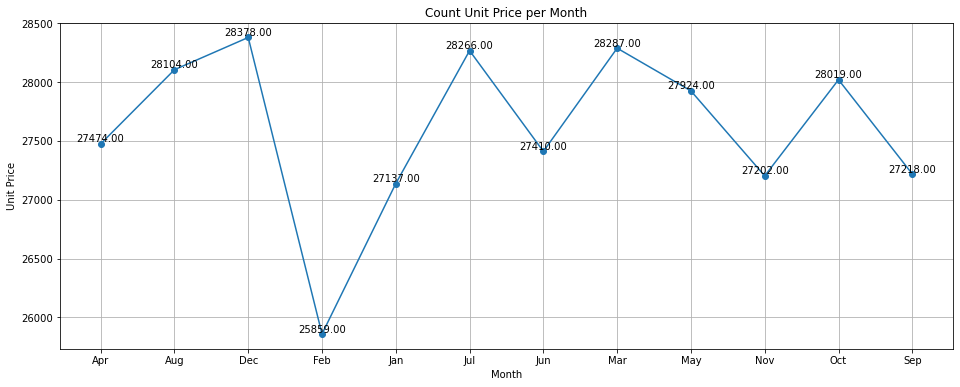

In [22]:
# Create the 'YY-MMM' column
df['Month'] = df['Datetime'].dt.strftime('%b')
eda_plot(df, 'Month', 'Unit_Price', 'bar', measurement='mean')
eda_plot(df, 'Month', 'Unit_Price', measurement='count')

#### D) Analysis:
- Customers buy expensive products on Feb, but Feb has the least customer transactions.
- August, December, July, and March are the months Retail Hypermarket can expect the most customer activities.

#### E) Conclusion:
- Higher prices could deter customers from engaging with purchases as proven by Feb.
- Quarter is quite a weak predictor, but month could be a strong predictor.

#### 2.4.4 Relationship between quantity and quality
- Do customers purchase more when products are cheaper or buy fewer when prices are higher?

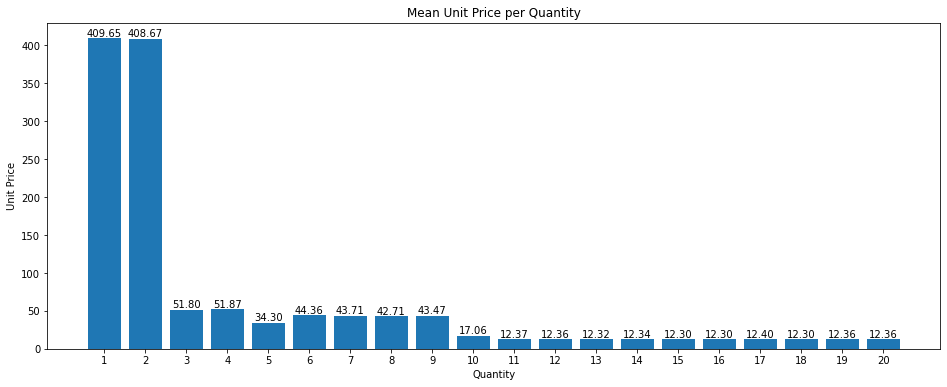

In [23]:
eda_plot(df, 'Quantity', 'Unit_Price', 'bar', measurement='mean')

#### A) Analysis:
1. Each transaction can have a quantity of 1 to 20 of a product.
2. 3 Classes observed:
    - Customers usually only buy 1-2 of an expensive product.
    - Customers buy 3-9 of a mid-range priced product.
    - Customers buy cheap products below 20 dollars in bulks of 10-20.

#### B) Evaluation:
Discounts isn't the explanation for customers to buy more of a product as a discount of 88% (350/400) is illogical. 

#### C) Conclusion:
- Quantity is a potential predictor because there is a distinguishable pattern.
- My hypothesis is that the product is the most significant determiner for the price. To validate this assumption, I shall perform EDA for Product Category.

#### 2.4.5 Price of products across categories

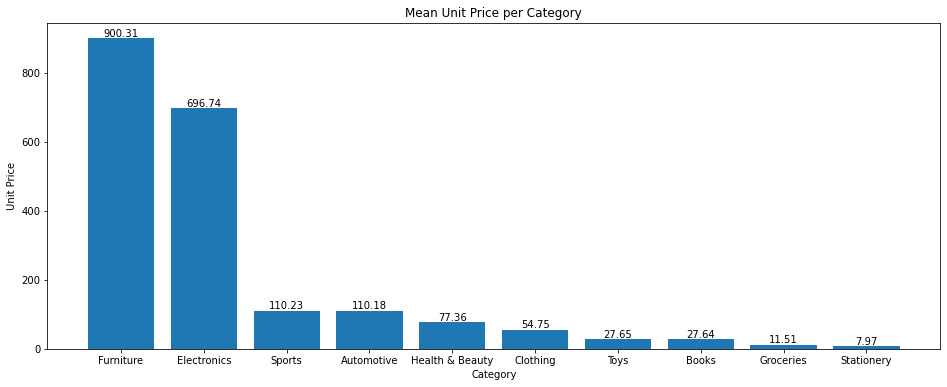

In [24]:
eda_plot(df, 'Category', 'Unit_Price', 'bar', 'mean')

#### A) Analysis
It's clear that Furniture an Electronic products are significantly more expensive on average.

#### B) Evaluation
- The previous graph now makes sense. It's logical for Customers to purchase groceries and stationery in bulk, Clothing and Toys in moderate volume, and just 1-2 Furniture or Electronics at a time.


- A potential concern is that there may be low-cost items like earpieces within the electronics category. To address this, a robust feature is needed to distinguish affordable products within expensive categories or vice versa.


- It's worth noting that there may be multicollinearity between the quantity of items purchased and the product category since the behavioural patterns explain each other.

#### C) Conclusion
Category is a useful predictor because there is an observable pattern.

#### 2.4.6.a Exploring relationship between Category and Product_ID
From 2.4.1, I discovered that the first 4 digits could represent something. To clarify my assumption, I shall investigate through visualisation.

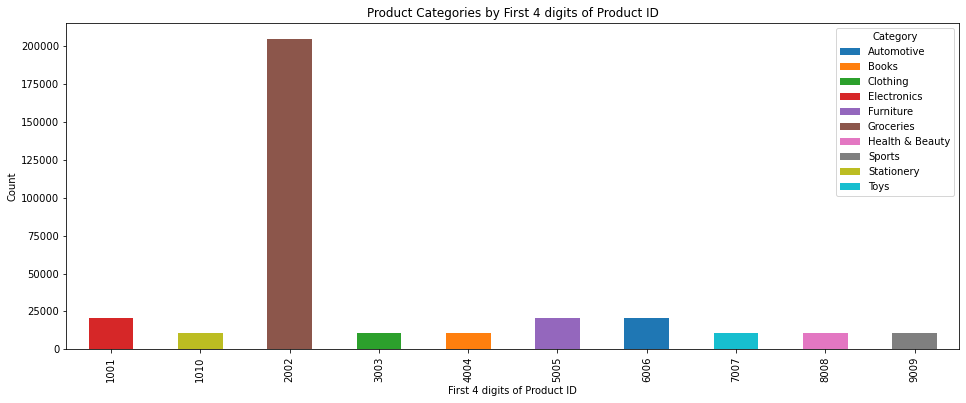

In [25]:
# Extract the first digit from 'Product_ID' and create a new column 'First_Digit'
df['4_digits'] = df['Product_ID'].astype(str).str[0:4]

# Group data by 'First_Digit' and 'Category' and count the occurrences
grouped = df.groupby(['4_digits', 'Category']).size().unstack(fill_value=0)

# Create a bar plot to visualize the relationship
grouped.plot(kind='bar', stacked=True, figsize=(16, 6))
plt.title("Product Categories by First 4 digits of Product ID")
plt.xlabel("First 4 digits of Product ID")
plt.ylabel("Count")
plt.show()

In [26]:
df.Product_ID.nunique() # count of distinct values

75725

#### A) Analysis
- First 4 digits of Product ID represents the category.
- Groceries are the most common products sold in Retail Hypermarket.

#### B) Evaluation
- There is no anomalous products that do not belong to a category.
- There are too many product IDs; high cardinality column.

#### 2.4.6.b Could Product Type be within Product_ID?
Since product category could be found within Product_ID, could the Product_ID also tell us what type of product it is?

In [27]:
df['Product_ID'].nunique() # how many product ids are there

75725

In [28]:
# Extract the 5th to 6th digits from the 'Product_ID'
df['Product_Type_1'] = df['Product_ID'].astype(str).str[4:6]

# Extract the 5th to 6th digits from the 'Product_ID'
df['Product_Type_2'] = df['Product_ID'].astype(str).str[6:9]

In [29]:
df['Product_Type_1'].nunique()

100

In [30]:
df['Product_Type_2'].nunique()

100

In [31]:
# How unique variations of products
df['Product_Type_3'] = df['Product_ID'].astype(str).str[4:9]
df['Product_Type_3'].nunique()

10000

#### C) Assumptions
#### 1.
- Product_Type_1 could represent the product type; what the product is.
- Product_Type_2 could represent the brand of the brand.

#### 2. 
Last 4 numbers could just be random variations to identify a product.

#### D) Conclusion
- Do not use Product ID as it could overfit model due to high cardinality.
- **Risky to use Product Types** as I'm unable to validate what they represent. Hence, it could violate the requirements of 'Need to be usable for new products' and it could also potential overfit the model due to high cardinality.

#### 2.4.7 Customer analysis
- I suspect a similar pattern with Customer ID where Retail Hypermarket labels their customer and puts the customer type as the header of the ID. Hence, I investigated each customer class.

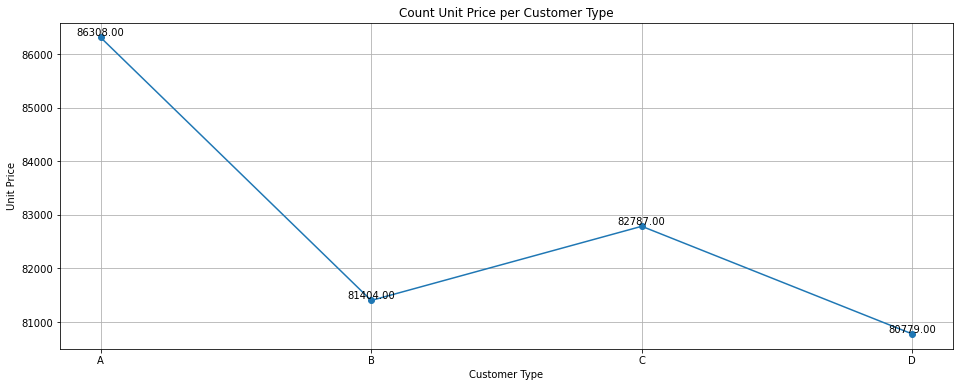

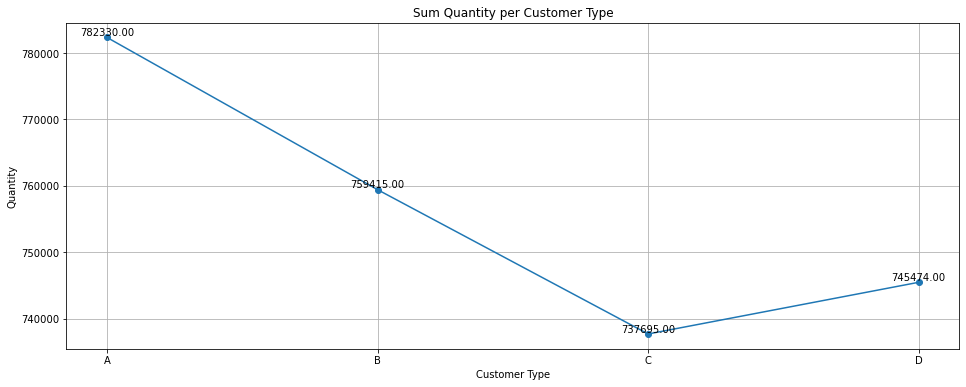

In [32]:
# Extract the first letter from 'Customer_ID' and create a new column 'Customer_Type'
df['Customer_Type'] = df['Customer_ID'].str[0].str.capitalize()

eda_plot(df, 'Customer_Type', 'Unit_Price', 'line', 'count')
eda_plot(df, 'Customer_Type', 'Quantity', 'line', 'sum')

#### A) Analysis
- Around 80K customers for each customer type; no class imbalance in customer type.
- First letter of Product ID represents the customer class.
- There is a discernable pattern between Customer Type and the quantity of products they buy.

#### B) Evaluation
- Type A customers are clearly the most loyal group of customers who frequent Retail Hypermarket and buy the most products, while type C customers buy the least products. 
- D seems to represent customers who are not yet grouped, which could indicate that they are newer customers.

#### C) Conclusion
- Customers are grouped based on how much products they buy, customers who buy a lot are valued higher with A type, and customers who buys few products are labelled as C. D represents new customers who are yet to be assigned into a group.
- Type A customers are the best customers in loyalty and buying the most products.
- Customer Type has interesting trends, and could be a useful predictor for models to study the intricate patterns of each customer type.

## 3. Modelling
### 3.0 Reusable Methods

#### 3.0.1 Importing libraries

In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import tree
import numpy as np

#### 3.0.2 Partitioner
To split dataset into train-test sets

#### Usage:
Provide DataFrame, target column, train size, and whether the predictors should be normalized for interepretability.

In [34]:
def partition(X, y, train_size=0.7, SEED=SEED, normalize=True):
    if normalize:
        scaler = StandardScaler()   # init scaler
        X = scaler.fit_transform(X) 

    # Split the normalized data into train and test sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=train_size, random_state=SEED) # SEED = 2202934

    return X_train, X_val, y_train, y_val

#### 3.0.3 Model Evaluator
Report on model's fit and how predictors explain prediction.

#### Usage:
Provide the trained model, Predictors DataFrame, Target DataFrame, original Predictors DataFrame (to obtain column names), are you evaluating with model's training dataset? [True/False] default=False, max_depth=[display branches to which level].

In [35]:
def evaluate_model(model, X, y, cols, training=False, max_depth=3):
    y_pred = model.predict(X)  # Predict using the model and predictors
    
    # Only runs for Linear Regression, when intercept_ is found in model
    if hasattr(model, 'intercept_') and training:                                          # ONLY run for training evaluation 
        print(f"Intercept: {model.intercept_:.2f}")                                        # print intercept
        print(pd.DataFrame(model.coef_, cols.columns, columns=["Coefficient"]))            # print col name: value
            
    # for black-box models like DTR
    elif hasattr(model, 'feature_importances_') and training:
        # visualize Tree
        plt.figure(figsize=(16,20))
        tree.plot_tree(model, feature_names=list(X_train.columns), max_depth=max_depth, filled=True, fontsize=10)
            
    elif hasattr(model, 'intercept_') or hasattr(model, 'feature_importances_'):
        pass  # if testing set, no need to report on features
    
    # catch error
    else:
        print("Model type not supported for obtaining coefficients or feature importance.")
    
    
    # Visualize the fit
    plt.figure(figsize=(16, 6))
    plt.scatter(y, y_pred, alpha=0.2)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted Values")
    plt.grid(True)
    plt.show()
    
    print(f"R-squared (Goodness of Fit): {r2_score(y, y_pred):.2f}")

#### 3.0.4 Accuracy Evaluator
Creates relevant assessments to report on a model's performance.

#### Usage:
Provide the trained model, Predictors DataFrame, Target DataFrame, sample size for visualization.

In [36]:
def evaluate_accuracy(model, X, y, sample_size=0):
    y_pred = model.predict(X)  # Predict using the model and predictors
    
    # formula to calculate MAPE
    n = len(y)
    mape = (1/n) * sum(abs((y - y_pred) / y) * 100)
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    
    # Visualize Accuracy
    if sample_size > 0:
        y = y.iloc[:sample_size] # subset y into sample size specified
        y_pred = y_pred[:sample_size]
        
    else:
        return # if no sample size = no need sampling analysis, end the function
    
    print("Sampled Analysis:")
    plt.figure(figsize=(16, 6))
    plt.plot(y.reset_index(drop=True), "red", label='Actual Data')
    plt.plot(y_pred, 'blue', label='Predicted Data', alpha=0.5)
    
    plt.ylabel('Unit_Price')
    plt.title('Actual Vs Predicted')
    plt.legend()
    plt.show()
    
    # formula to calculate MAPE
    n = len(y)
    mape = (1/n) * sum(abs((y - y_pred) / y) * 100)
    
    print(f"MAPE for sample: {mape:.2f}%")

### 3.1 Data Pre-processing
### 3.1.0 Encoders
Original columns will be dropped after encoding.

#### 1. One-Hot Encoder:

In [37]:
# One-Hot Encoding
def one_hot_encode(df, columns_to_encode):
    one_hot = pd.get_dummies(df[columns_to_encode])         # Create new col for each unique value in encoded column
    df = pd.concat([df, one_hot], axis=1)                   # Concatenate encoded columns with the original DataFrame
    df = df.drop(columns=columns_to_encode)                 # Drop cols after encoded
    
    return df

Input: DataFrame, [encode_col1, encode_col2]

#### 2.a Label Encoder:

In [38]:
from sklearn.preprocessing import LabelEncoder

def label_encode(df, columns_to_encode):
    label_encoders = {}     # Dictionary to store label encoders for each column
    df_encoded = df.copy()  # Create a copy of the DataFrame to avoid modifying the original

    for col in columns_to_encode:
        label_encoder = LabelEncoder()                               # Init the LabelEncoder
        encoded_data = label_encoder.fit_transform(df_encoded[col])  # Fit and transform the column
        df_encoded[col + '_encoded'] = encoded_data                  # Add the encoded column to the DataFrame

        label_encoders[col] = label_encoder                          # Store the label in the dictionary
        df_encoded.drop(col, axis=1, inplace=True)                   # Drop the original column

    return df_encoded, label_encoders

Input: DataFrame, [encode_col1, encode_col2]

#### 2.b Label Decoder:

In [39]:
def label_decoder(label_encoders):
    for col, encoder in label_encoders.items():
        print(f"Label values for {col}: {encoder.classes_}") # map out cols and labels

#### 3.1.1 Extract relevant features for Model's DataFrame:

In [40]:
df.head(1)

,Datetime,Product_ID,Category,Quantity,Unit_Price,Customer_ID,Quarter,Month,4_digits,Product_Type_1,Product_Type_2,Product_Type_3,Customer_Type
269220,2022-01-01,20028680,Groceries,15,10.140,c918818917,1,Jan,2002,86,80,8680,C


#### Do not use columns:
#### 1. Datetime:
- Target Leakage: future value.
- High cardinality and leads to overfitting.

#### 2. Product_ID:
- Violates business requirement: Model must work for new unseen values.
- High cardinality and leads to overfitting.

#### 3. Customer ID:
- Violates business requirement: Model must work for new unseen values.
- High cardinality and leads to overfitting.

#### 4. First 4 digits of Product_ID:
- Same meaning and value as category, leading to multicollinearity.

#### 5. Month:
- Multicollinearity with Quarter as Quarter can be derived by grouping the months in 4 quarters.
- Quarter chosen to represent 'market trend' to keep the baseline model's simplicity. 

In [41]:
# Subset a predictors and Target into DataFrames for modelling
X = df[['Category', 'Quantity', 'Customer_Type', 'Quarter']] # predictors
y = df['Unit_Price']                                         # Target

#### 3.1.2 Encoding predictors
I selected one-hot encoding as its easy to interpret and is the most common encoding method used.

In [42]:
X = one_hot_encode(X, ['Category', 'Customer_Type', 'Quarter'])

In [43]:
X.columns # Check all columns in predictors DataFrame

Index(['Quantity', 'Category_Automotive', 'Category_Books',
       'Category_Clothing', 'Category_Electronics', 'Category_Furniture',
       'Category_Groceries', 'Category_Health & Beauty', 'Category_Sports',
       'Category_Stationery', 'Category_Toys', 'Customer_Type_A',
       'Customer_Type_B', 'Customer_Type_C', 'Customer_Type_D', 'Quarter_1',
       'Quarter_2', 'Quarter_3', 'Quarter_4'],
      dtype='object')

#### 3.1.3 Data Partitioning
Splitting dataset into train-test sets where 70% of data is for training and 30% is for validation. Normalization not needed as all features are 0 or 1 except for quantity because their are derived from one-hot encoding. Hence, the model can be interpreted fairly without normalization.

In [44]:
X_train, X_val, y_train, y_val = partition(X, y, train_size=0.7, normalize=False)

### 3.2 Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()        # init model
LR_model.fit(X_train, y_train)       # train model

LinearRegression()

#### Evaluate Model explanability on training set:

Intercept: 201.13
                          Coefficient
Quantity                        0.277
Category_Automotive           -91.512
Category_Books               -174.415
Category_Clothing            -147.268
Category_Electronics          494.686
Category_Furniture            699.317
Category_Groceries           -193.120
Category_Health & Beauty     -125.086
Category_Sports               -91.383
Category_Stationery          -196.067
Category_Toys                -175.152
Customer_Type_A                -0.049
Customer_Type_B                 0.426
Customer_Type_C                -0.274
Customer_Type_D                -0.103
Quarter_1                       0.126
Quarter_2                      -0.203
Quarter_3                      -0.412
Quarter_4                       0.489


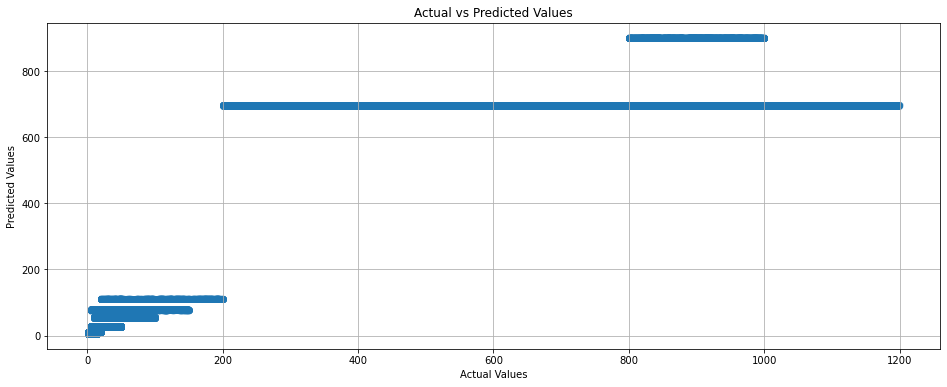

R-squared (Goodness of Fit): 0.92


In [46]:
evaluate_model(LR_model, X_train, y_train, X, training=True) 
# Model, training predictors, training targets, predictors, isTraining

#### Model performance on training set:

In [47]:
evaluate_accuracy(LR_model, X_train, y_train)

Mean Absolute Percentage Error (MAPE): 44.27%


#### Evaluate Model explanability on validation set:

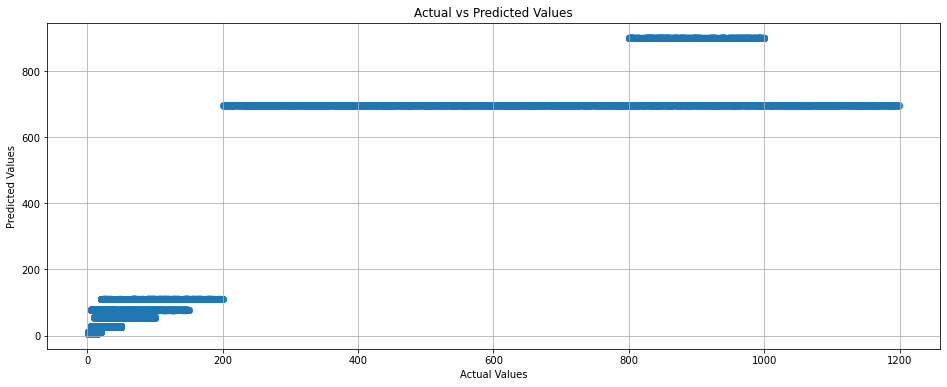

R-squared (Goodness of Fit): 0.92


In [48]:
evaluate_model(LR_model, X_val, y_val, X)

#### Model performance on training set:

Mean Absolute Percentage Error (MAPE): 44.03%
Sampled Analysis:


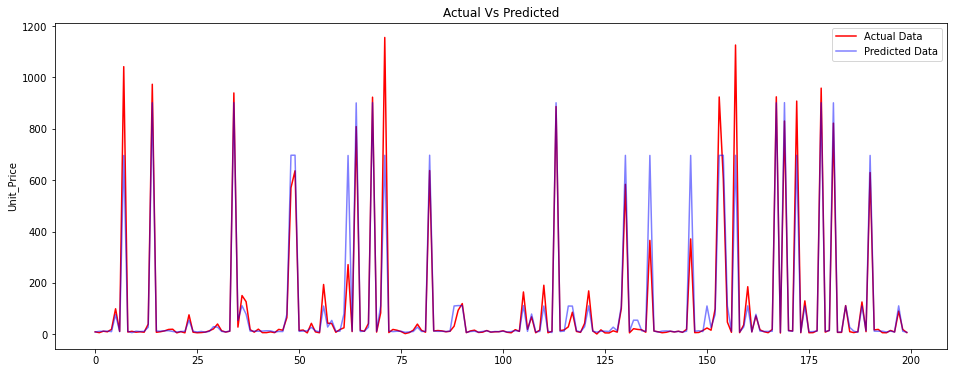

MAPE for sample: 45.67%


In [49]:
evaluate_accuracy(LR_model, X_val, y_val, sample_size=200) # edit sample_size to explore

### Analysis:
1. LR Model able to closely follow the pattern of actual unit prices.
2. LR Model has tendency of significantly underpredicting expensive products, which is NOT GOOD as this means Retail Hypermarket must sell an expensive product for cheap, potentially inccuring a loss, when customers see the prediction of the model as their calculated price.
3. Model is exhibits a high degree of explanatory power with an R-squared (R²) value of 92%. This suggests reliability in predictions.

### 3.3 Decision Tree Regression

In [50]:
#Build DTR model
from sklearn.tree import DecisionTreeRegressor
DTR_model = DecisionTreeRegressor(random_state=SEED).fit(X_train , y_train) # train model

#### Evaluate Model explanability on training set:

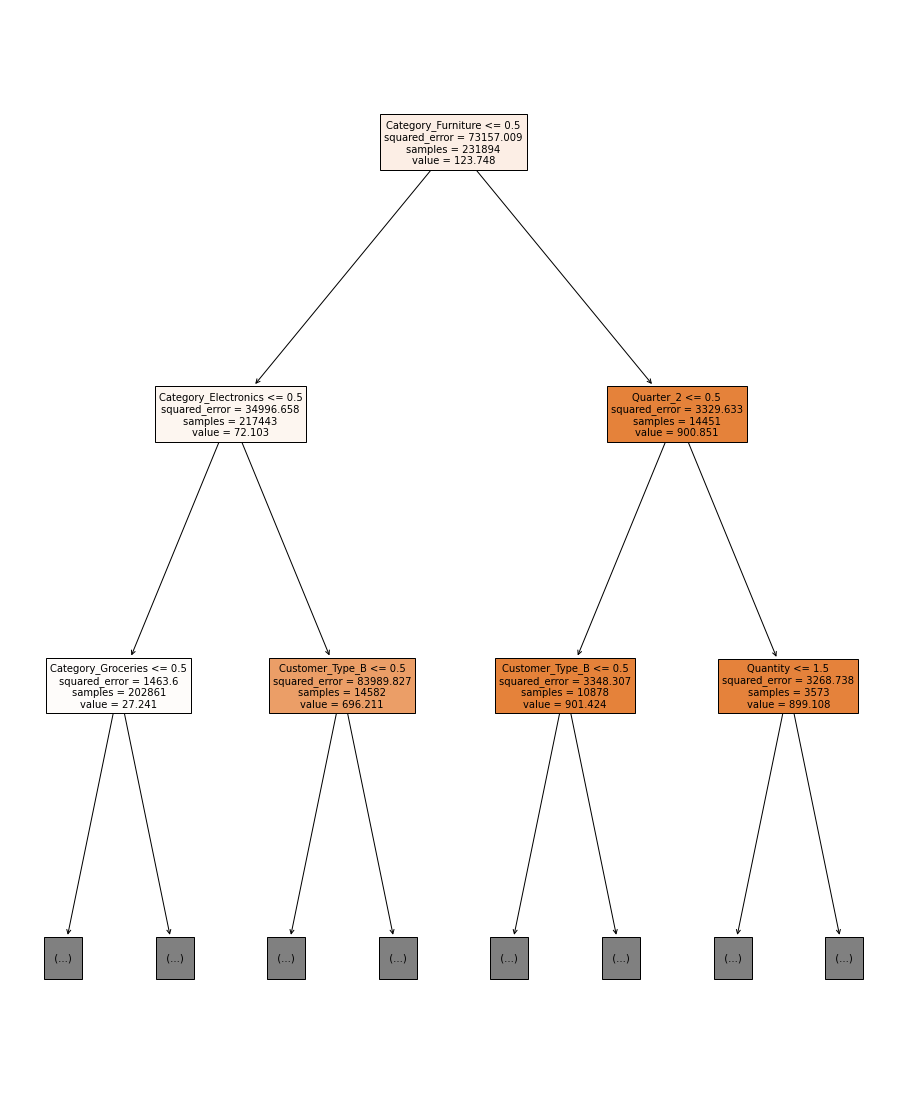

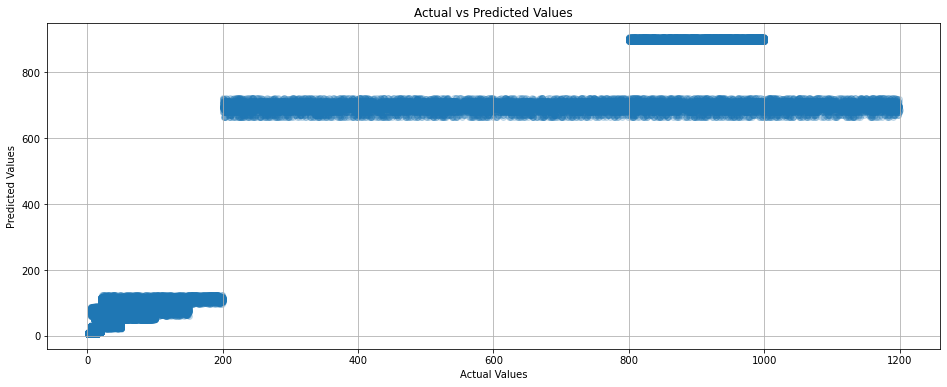

R-squared (Goodness of Fit): 0.92


In [51]:
evaluate_model(DTR_model, X_train, y_train, X, training=True, max_depth=2)

#### Model performance on training set:

In [52]:
evaluate_accuracy(DTR_model, X_train, y_train)

Mean Absolute Percentage Error (MAPE): 43.06%


#### Evaluate Model explanability on validation set:

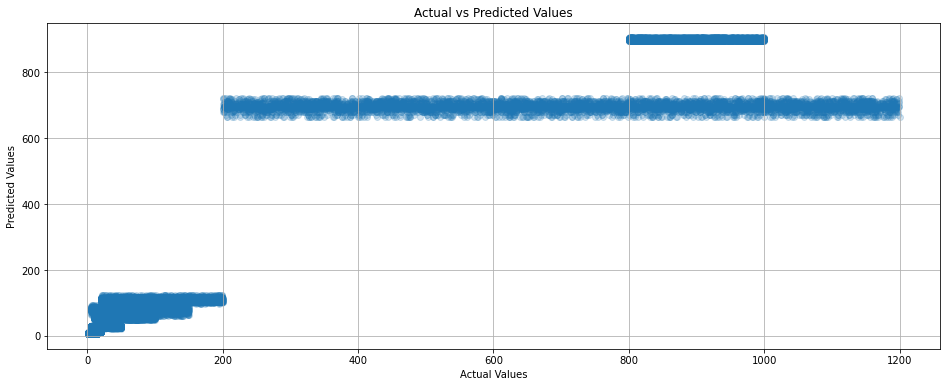

R-squared (Goodness of Fit): 0.92


In [53]:
evaluate_model(DTR_model, X_val, y_val, X)

#### Model performance on training set:

Mean Absolute Percentage Error (MAPE): 43.22%
Sampled Analysis:


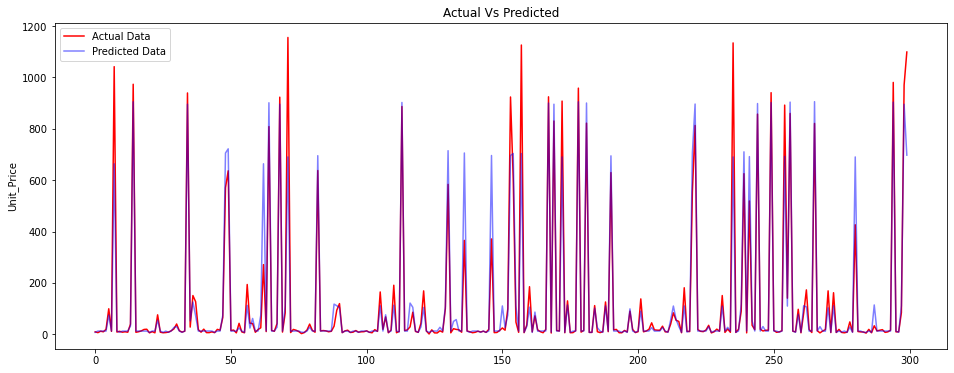

MAPE for sample: 42.13%


In [54]:
evaluate_accuracy(DTR_model, X_val, y_val, sample_size=300) # edit sample_size to explore

#### Analysis:
1. The DTR Model seems to capture the general trend of prices better than the LR Model, closely following the actual data line.
2. MAPE for DTR is better than LR by around 1%.
3. DTR Model also underpredicts expensive products.

#### Evaluation of Baseline Models:
- Both Models have high R-Squared indicating that the predictors are able to explain the target. This is a good sign as there is a relationship that can explain the unit prices of a product, validating that I can proceed to improve the model.
- However, high R-Squared may indicate a potential target leakage in atleast 1 of the columns.

- R-Squared training set and validation set are consistent, likely suggesting no overfitting since the 2 datasets are split by random.

#### Conclusion:
Although **both models meet requirements for explainability of model** (High R^2) and **no overfitting** (performs equally well for validation set), the **accuracy requirement is NOT met**. 

Hence, improvements are needed to bring down the MAPE; increase the accuracy of model. As DTR performed slightly better, I will focus on black-box models as they are known for their ability to capture non-linear trends and complex patterns, hence able in producing impressively high accuracy.

### References for part 1:
- 1.0 Problem Framing: Creating Week 03 Workshop 05: Problem Framing. Temasek Polytechnic. 
- 1.6 Metrics for evaluating models. Week 02 Workshop 04: Model Scoring
- 1.6 Understanding MAPE for evaluating model accuracy for businesses. https://www.statology.org/what-is-a-good-mape/
- 1.7 Acceptable ranges for MAPE. https://www.researchgate.net/figure/MAPE-CRITERIA-FOR-MODEL-EVALUATION_tbl1_27219891
- 1.8 Considering environmental factors: Ideas were improved upon suggestions from ChatGPT.
- 1.9 Formulating potential Target Leakages, Week 03 Workshop 06: Target Leakage
- 2.1 Data Dictionary is taken from project specifications.
- 2.4.2 EDA Graph Plotter is built with ChatGPT. OpenAI. (2023, October 30). Re: Python Code for Creating Line and Bar Plots in EDA [Online Forum Comment]. ChatGPT by OpenAI. https://www.chatgpt.com
- 2.4.6 Graph of Total Revenue per Product is adapted from ChatGPT's code. OpenAI. (2023, October 30). Re: Python Code for Creating Line and Bar Plots in EDA [Online Forum Comment]. ChatGPT by OpenAI. https://www.chatgpt.com
- 3.0 Reusable methods are built with ChatGPT. OpenAI. (2023, October 31).
- 3.0.3 Coefficient of predictors table adapted from P01_RecapML 4.4 Model Interpretation#Coefficients. Temasek Polytechnic.
- 3.0.4 Sampled analysis graph is adapted from P01_RecapML 4.4 Model Interpretation#Plot of y_pred and y_test. Temasek Polytechnic.
- 3.1.0 One-Hot encoder built with ChatGPT. OpenAI. (2023, October 31). Re: # One-Hot Encoding
def one-hot(): // create a one-hot encoder function. input: df, columns to be encoder [Online Forum Comment]. ChatGPT by OpenAI. https://www.chatgpt.com
- 3.1.0 Label encoder and decoder built using One-Hot encoder and Lab P01_RecapML#3. Data Preparation
- 3.3 Code to visualize Decision Tree Regressor is taken from Lab P02_TreeBasedAlgorithm#2.4 Limitations of DT#Method 2 

Guide for Data Modelling:
- Ameisen, E. (2018, March 6). Always start with a stupid model, no exceptions. Medium. https://blog.insightdatascience.com/always-start-with-a-stupid-model-no-exceptions-3a22314b9aaa 
- Nair, A. (2022, April 9). Baseline Models: Your Guide For Model Building - Towards Data Science. Medium. https://towardsdatascience.com/baseline-models-your-guide-for-model-building-1ec3aa244b8d 

### End of Part 1